In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
# Replace 'your_file.csv' with your actual file path
dfw = pd.read_csv('weather-010824-061024.csv')


dfw.head
# Display initial info about NaN values
print("Initial NaN count per column:")
print(dfw.isnull().sum())

# Option 1: Remove rows with any NaN values
dfw_clean = dfw.dropna()

# Option 2: Fill NaN values with mean of the column
#df10_clean = df10.fillna(df10_clean.mean())

# Option 3: Fill NaN values with median of the column
# df_clean = df.fillna(df.median())

# Option 4: Fill NaN values with 0
dfw_clean = dfw.fillna(0)

print("\nShape before cleaning:", dfw.shape)
print("Shape after cleaning:", dfw_clean.shape)
dfw.describe()

Initial NaN count per column:
id             0
hum            0
pres           0
rain_1h        0
wind_speed     0
wind_deg       0
clouds_all     0
ts_get         0
max_temp       0
min_temp       0
ave_temp       0
cod_weather    0
dtype: int64

Shape before cleaning: (1658, 12)
Shape after cleaning: (1658, 12)


,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,max_temp,min_temp,ave_temp,cod_weather
count,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000,1658.000000
mean,42580.500000,63.146562,1013.204463,0.027835,3.855072,223.652593,12.585042,25.521043,24.121049,24.915084,791.086852
std,478.767689,12.288755,3.075757,0.275233,2.109445,118.143934,21.160828,4.465253,4.554314,4.424531,61.331334
min,41752.000000,16.000000,1002.000000,0.000000,0.140000,0.000000,0.000000,13.750000,11.810000,12.850000,200.000000
25%,42166.250000,55.000000,1011.000000,0.000000,2.240000,150.000000,0.000000,22.660000,20.970000,22.010000,800.000000
50%,42580.500000,65.000000,1013.000000,0.000000,3.600000,210.000000,0.000000,25.440000,23.935000,24.970000,800.000000
75%,42994.750000,72.000000,1015.000000,0.000000,5.140000,340.000000,20.000000,28.810000,27.680000,28.300000,801.000000
max,43409.000000,89.000000,1024.000000,6.300000,12.860000,360.000000,100.000000,38.810000,35.810000,38.770000,804.000000


In [7]:
dfw_clean = dfw_clean.sort_values(by=['ts_get'], ascending=True)
dfw_clean = dfw_clean.reset_index(drop=True)
normalized_data = (dfw_clean['rain_1h'] - dfw_clean['rain_1h'].min()) / (dfw_clean['rain_1h'].max() - dfw_clean['rain_1h'].min())

In [8]:
dfw_clean

,id,hum,pres,rain_1h,wind_speed,wind_deg,clouds_all,ts_get,max_temp,min_temp,ave_temp,cod_weather
0,41752,62,1013,0.0,1.54,360,0,2024-08-01 00:00:02,28.21,25.46,27.35,800
1,41753,60,1013,0.0,1.03,0,0,2024-08-01 01:00:01,27.66,24.81,26.85,800
2,41754,66,1013,0.0,1.54,10,0,2024-08-01 02:00:03,27.10,23.81,26.16,800
3,41755,61,1012,0.0,1.03,0,0,2024-08-01 03:00:02,25.97,23.79,24.97,800
4,41756,62,1013,0.0,1.54,50,0,2024-08-01 04:00:03,25.97,22.81,24.87,800
...,...,...,...,...,...,...,...,...,...,...,...,...
1653,43405,87,1013,0.0,3.09,340,20,2024-10-09 03:00:03,18.79,17.08,17.30,801
1654,43406,87,1012,0.0,2.06,340,97,2024-10-09 04:00:02,18.79,17.10,17.48,804
1655,43407,85,1012,0.0,1.03,0,97,2024-10-09 05:00:09,17.10,15.81,17.10,804
1656,43408,85,1013,0.0,1.03,60,0,2024-10-09 06:00:02,17.66,15.81,17.57,800


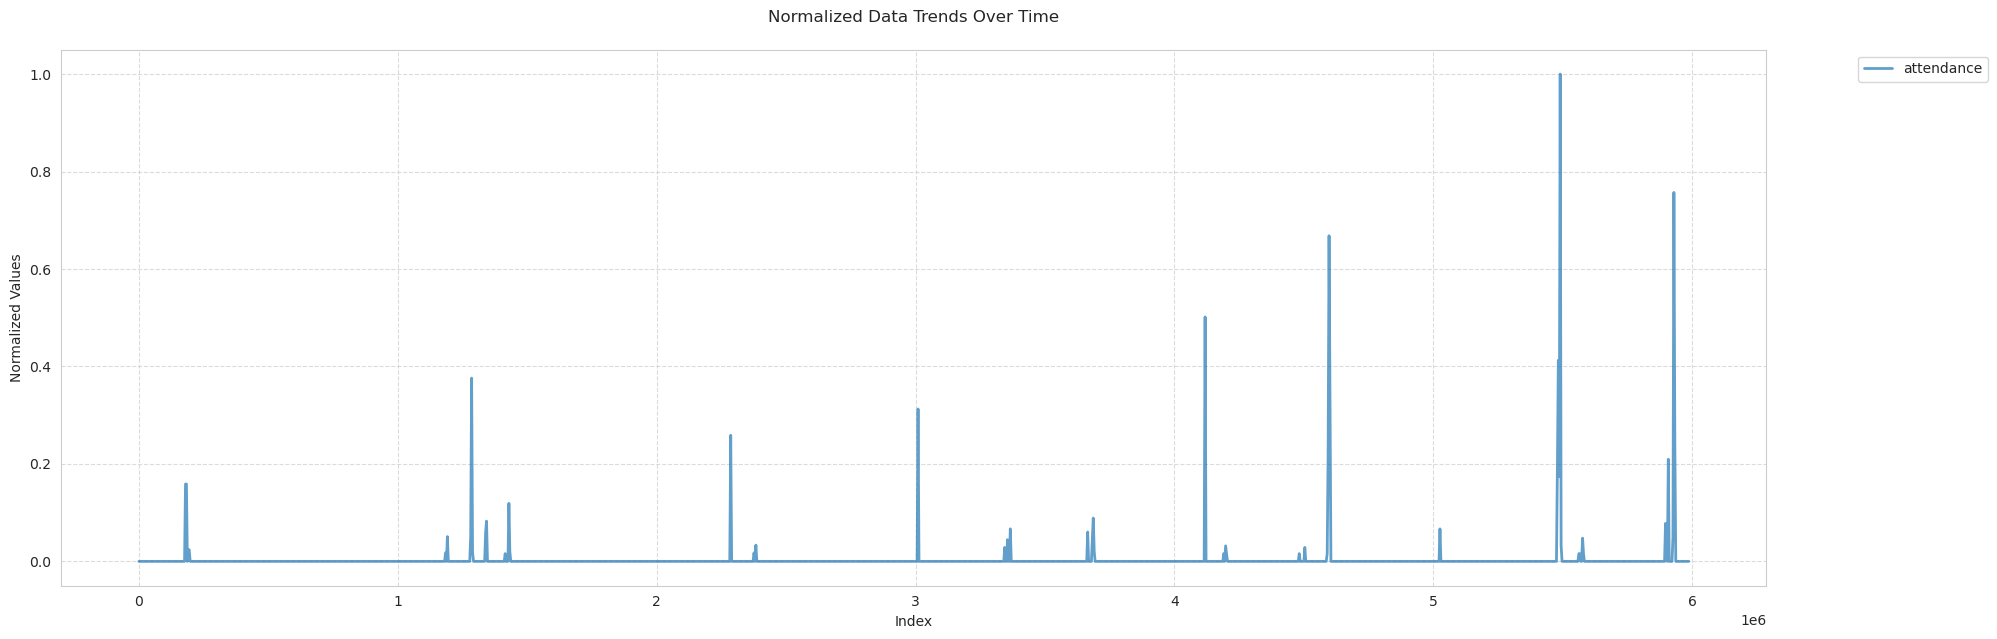

In [9]:
fig = plt.figure(figsize=(20, 12))

# Define grid layout
gs = fig.add_gridspec(2, 2)

# 1. Line plots of all numeric columns
ax1 = fig.add_subplot(gs[0, :])  # Top row, full width

seconds = (pd.to_datetime(dfw_clean.ts_get).astype(int)//10**9) - 1722470400 # convert in seconds from 2024-08-01 00:00:00
ax1.plot(seconds, normalized_data, label="attendance", linewidth=2, alpha=0.7)

ax1.set_title('Normalized Data Trends Over Time', pad=20)
ax1.set_xlabel('Index')
ax1.set_ylabel('Normalized Values')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()